#### Data load

In [1]:
import pandas as pd
import numpy as np

# Load and merge as before
excel_file = './stock_market_data.xlsx'
prices_2010_2020 = pd.read_excel(excel_file, sheet_name='2010-2020')
prices_2021_2024 = pd.read_excel(excel_file, sheet_name='2021-2024')
price_df = pd.concat([prices_2010_2020, prices_2021_2024], ignore_index=True)

# exclude 2010,2011 data
price_df = price_df[~price_df['Date'].dt.year.isin([2010, 2011])]

# Convert 'NULL' strings to actual NaN
price_df.replace('NULL', np.nan, inplace=True)

# no of total rows
total_rows = price_df.shape[0]

price_df.head(20)




,Date,Symbol,Open_Price,High_Price,Low_Price,Closing_Price,no_of_trade,Volume,Turnover
119570,2012-01-01,1JANATAMF,9.0,9.1,8.7,8.9,287.0,701000.0,6282000.0
119571,2012-01-01,1STBSRS,94.0,97.5,94.0,95.9,44.0,26500.0,2527000.0
119572,2012-01-01,1STPRIMFMF,22.0,23.8,21.7,22.8,348.0,558000.0,12701000.0
119573,2012-01-01,5THICB,155.1,155.1,155.1,155.1,1.0,100.0,16000.0
119574,2012-01-01,6THICB,48.3,48.4,47.2,47.7,41.0,13200.0,630000.0
119575,2012-01-01,7THICB,91.0,92.2,91.0,91.6,2.0,1000.0,92000.0
119576,2012-01-01,ABBANK,68.8,69.2,68.0,68.7,1113.0,409600.0,28041000.0
119577,2012-01-01,ACI,206.0,212.1,206.0,210.6,93.0,10000.0,2104000.0
119578,2012-01-01,ACIFORMULA,89.3,92.0,89.3,89.9,203.0,44600.0,4067000.0
119579,2012-01-01,ACIZCBOND,825.5,827.0,820.5,822.0,88.0,3044.0,2503000.0


#### Step2: Preprocess the dataset

In [2]:

# Convert 'Date' column to datetime
price_df['Date'] = pd.to_datetime(price_df['Date'], format='%Y-%m-%d', errors='coerce')


# print the symbol contains null any column
null_columns = price_df.columns[price_df.isnull().any()].tolist()
print("Columns with null values:", null_columns)

# Check for any rows with null values in any column
null_rows_df = price_df[price_df.isnull().any(axis=1)]
null_rows_count = null_rows_df.shape[0]
print("Number of rows with null values:", null_rows_count, "out of", total_rows)

null_rows_df.head(20)

# remove the rows with null values
price_df.dropna(inplace=True)
cleaned_df = price_df.copy()
# Check the number of rows after dropping nulls
remaining_rows = price_df.shape[0]
print("Number of rows after dropping null values:", remaining_rows)

# price_df number of rows
print("Number of rows in price_df:", price_df.shape[0])

cleaned_df.head(20)


## debug to see that null values are removed or not

# # check date 2014-12-11 for symbol '3RDICB'
# date_check_df = price_df[(price_df['Date'] == '2014-12-11') & (price_df['Symbol'] == '3RDICB')]
# if not date_check_df.empty:
#     print("Data for 3RDICB on 2014-12-11:")
#     print(date_check_df)
# else:
#     print("No data found for 3RDICB on 2014-12-11.")



Columns with null values: ['no_of_trade', 'Volume', 'Turnover']
Number of rows with null values: 77637 out of 1107420
Number of rows after dropping null values: 1029783
Number of rows in price_df: 1029783


,Date,Symbol,Open_Price,High_Price,Low_Price,Closing_Price,no_of_trade,Volume,Turnover
119570,2012-01-01,1JANATAMF,9.0,9.1,8.7,8.9,287.0,701000.0,6282000.0
119571,2012-01-01,1STBSRS,94.0,97.5,94.0,95.9,44.0,26500.0,2527000.0
119572,2012-01-01,1STPRIMFMF,22.0,23.8,21.7,22.8,348.0,558000.0,12701000.0
119573,2012-01-01,5THICB,155.1,155.1,155.1,155.1,1.0,100.0,16000.0
119574,2012-01-01,6THICB,48.3,48.4,47.2,47.7,41.0,13200.0,630000.0
119575,2012-01-01,7THICB,91.0,92.2,91.0,91.6,2.0,1000.0,92000.0
119576,2012-01-01,ABBANK,68.8,69.2,68.0,68.7,1113.0,409600.0,28041000.0
119577,2012-01-01,ACI,206.0,212.1,206.0,210.6,93.0,10000.0,2104000.0
119578,2012-01-01,ACIFORMULA,89.3,92.0,89.3,89.9,203.0,44600.0,4067000.0
119579,2012-01-01,ACIZCBOND,825.5,827.0,820.5,822.0,88.0,3044.0,2503000.0


In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

show_plot_for_symbol = 'BEXIMCO' 
symbol_df = cleaned_df[cleaned_df['Symbol'] == show_plot_for_symbol]

# Create subplots
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.03, 
                    row_heights=[0.6, 0.2, 0.2])

# Candlestick
fig.add_trace(go.Candlestick(x=symbol_df['Date'],
                             open=symbol_df['Open_Price'],
                             high=symbol_df['High_Price'],
                             low=symbol_df['Low_Price'],
                             close=symbol_df['Closing_Price'],
                             name='Price'), row=1, col=1)

# Volume
fig.add_trace(go.Bar(x=symbol_df['Date'], 
                     y=symbol_df['Volume'],
                     name='Volume',
                     marker_color='green'), row=2, col=1)

# Turnover
fig.add_trace(go.Scatter(x=symbol_df['Date'],
                         y=symbol_df['Turnover'],
                         name='Turnover',
                         line=dict(color='blue')), row=3, col=1)

# Update layout
fig.update_layout(title=f'{show_plot_for_symbol} Stock Analysis',
                  height=800,
                  xaxis_rangeslider_visible=False)

fig.show()

#### Step3: Feature engineering
Features:
- Price Change
- Intraday range
- Volatility
- Volume spike
- Trade count spike
- Turnover spike
- VWAP
- Relative turnover
- Price-to-Volume Ration

30 day rolling window

In [4]:
#show all columns
pd.set_option('display.max_columns', None)

df = cleaned_df.copy()

# Price Change (%) = (Closing - Opening) / Opening × 100
df['Price_Change_Pct'] = ((df['Closing_Price'] - df['Open_Price']) / df['Open_Price']) * 100

# Intraday Range = High - Low
df['Intraday_Range'] = df['High_Price'] - df['Low_Price']

# Volatility = Rolling standard deviation of Closing_Price (30-day)
df['Volatility'] = df.groupby('Symbol')['Closing_Price'].transform(
    lambda x: x.rolling(30, min_periods=1).std())

# Volume Spike = Volume / 30-day moving average
df['Avg_Volume_30d'] = df.groupby('Symbol')['Volume'].transform(
    lambda x: x.rolling(30, min_periods=1).mean())
df['Volume_Spike'] = df['Volume'] / df['Avg_Volume_30d']

# Trade Count Spike = no_of_trade / 30-day moving average
df['Avg_Trade_Count_30d'] = df.groupby('Symbol')['no_of_trade'].transform(
    lambda x: x.rolling(30, min_periods=1).mean())
df['Trade_Count_Spike'] = df['no_of_trade'] / df['Avg_Trade_Count_30d']

# Turnover Spike = Turnover / 30-day moving average
df['Avg_Turnover_30d'] = df.groupby('Symbol')['Turnover'].transform(
    lambda x: x.rolling(30, min_periods=1).mean())
df['Turnover_Spike'] = df['Turnover'] / df['Avg_Turnover_30d']

# VWAP = Turnover / Volume
df['VWAP'] = df['Turnover'] / df['Volume']

# Relative Turnover = Turnover / (no_of_trade × avg_price)
df['Avg_Price'] = (df['Open_Price'] + df['Closing_Price']) / 2
df['Relative_Turnover'] = df['Turnover'] / (df['no_of_trade'] * df['Avg_Price'])

# Price-to-Volume Ratio = Closing_Price / Volume
df['Price_to_Volume_Ratio'] = df['Closing_Price'] / df['Volume']

# Handle NaN/Infinite values using explicit assignment
for col in ['Volume_Spike', 'Trade_Count_Spike', 'Turnover_Spike', 'VWAP', 
            'Relative_Turnover', 'Price_to_Volume_Ratio', 'Volatility']:
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)
    df[col] = df[col].fillna(1.0 if 'Spike' in col or 'Ratio' in col else 0.0)

#show the features
df.head(10)

,Date,Symbol,Open_Price,High_Price,Low_Price,Closing_Price,no_of_trade,Volume,Turnover,Price_Change_Pct,Intraday_Range,Volatility,Avg_Volume_30d,Volume_Spike,Avg_Trade_Count_30d,Trade_Count_Spike,Avg_Turnover_30d,Turnover_Spike,VWAP,Avg_Price,Relative_Turnover,Price_to_Volume_Ratio
119570,2012-01-01,1JANATAMF,9.0,9.1,8.7,8.9,287.0,701000.0,6282000.0,-1.111111,0.4,0.0,701000.0,1.0,287.0,1.0,6282000.0,1.0,8.961484,8.95,2445.642653,0.000013
119571,2012-01-01,1STBSRS,94.0,97.5,94.0,95.9,44.0,26500.0,2527000.0,2.021277,3.5,0.0,26500.0,1.0,44.0,1.0,2527000.0,1.0,95.358491,94.95,604.863804,0.003619
119572,2012-01-01,1STPRIMFMF,22.0,23.8,21.7,22.8,348.0,558000.0,12701000.0,3.636364,2.1,0.0,558000.0,1.0,348.0,1.0,12701000.0,1.0,22.761649,22.40,1629.336002,0.000041
119573,2012-01-01,5THICB,155.1,155.1,155.1,155.1,1.0,100.0,16000.0,0.000000,0.0,0.0,100.0,1.0,1.0,1.0,16000.0,1.0,160.000000,155.10,103.159252,1.551000
119574,2012-01-01,6THICB,48.3,48.4,47.2,47.7,41.0,13200.0,630000.0,-1.242236,1.2,0.0,13200.0,1.0,41.0,1.0,630000.0,1.0,47.727273,48.00,320.121951,0.003614
119575,2012-01-01,7THICB,91.0,92.2,91.0,91.6,2.0,1000.0,92000.0,0.659341,1.2,0.0,1000.0,1.0,2.0,1.0,92000.0,1.0,92.000000,91.30,503.833516,0.091600
119576,2012-01-01,ABBANK,68.8,69.2,68.0,68.7,1113.0,409600.0,28041000.0,-0.145349,1.2,0.0,409600.0,1.0,1113.0,1.0,28041000.0,1.0,68.459473,68.75,366.459201,0.000168
119577,2012-01-01,ACI,206.0,212.1,206.0,210.6,93.0,10000.0,2104000.0,2.233010,6.1,0.0,10000.0,1.0,93.0,1.0,2104000.0,1.0,210.400000,208.30,108.610926,0.021060
119578,2012-01-01,ACIFORMULA,89.3,92.0,89.3,89.9,203.0,44600.0,4067000.0,0.671892,2.7,0.0,44600.0,1.0,203.0,1.0,4067000.0,1.0,91.188341,89.60,223.599138,0.002016
119579,2012-01-01,ACIZCBOND,825.5,827.0,820.5,822.0,88.0,3044.0,2503000.0,-0.423985,6.5,0.0,3044.0,1.0,88.0,1.0,2503000.0,1.0,822.273325,823.75,34.528901,0.270039


#### Step 4: Feature Scaling

- Selected relevant features for scaling.
- Checked for and counted rows containing infinite (`inf`, `-inf`) or missing (`NaN`) values, which can occur due to division by zero or missing data in previous calculations.
- Replaced infinite values with `NaN` and removed all rows with missing or infinite values to ensure clean data for scaling.
- Used `StandardScaler` to standardize each feature so that they have a `mean of 0` and a standard `deviation of 1`. This ensures all features contribute equally to the model.

This process helps improve the accuracy and stability of downstream machine learning algorithms.

In [5]:
from sklearn.preprocessing import StandardScaler

features = ['Price_Change_Pct', 'Intraday_Range', 'Volatility', 'Volume_Spike', 
            'Trade_Count_Spike', 'Turnover_Spike', 'VWAP', 'Relative_Turnover', 
            'Price_to_Volume_Ratio']
X = df[features].copy()

# Count rows before cleaning
rows_before = X.shape[0]

# Find rows with inf/-inf or NaN
mask_inf = X.isin([np.inf, -np.inf]).any(axis=1)
mask_nan = X.isnull().any(axis=1)
rows_with_issues = X[mask_inf | mask_nan].shape[0]
print(f"Rows with inf/-inf or NaN: {rows_with_issues}")

# Remove inf/-inf and NaN before scaling
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

rows_after = X.shape[0]
print(f"Rows before cleaning: {rows_before}, after cleaning: {rows_after}")

# Align df with X to maintain consistency
df = df.loc[X.index]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features, index=X.index)

X_scaled.head(10)

Rows with inf/-inf or NaN: 10400
Rows before cleaning: 1029783, after cleaning: 1019383


,Price_Change_Pct,Intraday_Range,Volatility,Volume_Spike,Trade_Count_Spike,Turnover_Spike,VWAP,Relative_Turnover,Price_to_Volume_Ratio
119570,-0.090096,-0.270875,-0.186709,-0.060295,-0.058435,-0.063839,-0.102336,0.531743,-0.004887
119571,0.281562,0.026373,-0.186709,-0.060295,-0.058435,-0.063839,-0.022923,-0.317267,-0.004883
119572,0.473193,-0.107868,-0.186709,-0.060295,-0.058435,-0.063839,-0.089652,0.155243,-0.004887
119573,0.041737,-0.309229,-0.186709,-0.060295,-0.058435,-0.063839,0.036493,-0.548665,-0.003403
119574,-0.105654,-0.194166,-0.186709,-0.060295,-0.058435,-0.063839,-0.066704,-0.448597,-0.004883
119575,0.119968,-0.194166,-0.186709,-0.060295,-0.058435,-0.063839,-0.026010,-0.363865,-0.004799
119576,0.024492,-0.194166,-0.186709,-0.060295,-0.058435,-0.063839,-0.047648,-0.427225,-0.004886
119577,0.306684,0.275677,-0.186709,-0.060295,-0.058435,-0.063839,0.082819,-0.546150,-0.004866
119578,0.121457,-0.050336,-0.186709,-0.060295,-0.058435,-0.063839,-0.026756,-0.493115,-0.004885
119579,-0.008569,0.314031,-0.186709,-0.060295,-0.058435,-0.063839,0.645232,-0.580319,-0.004628


#### Step 5: Clustering with K-Means++ (Elbow Method)
- Checking the elbow point (where the inertia doesnt change even with the increment with the clusters)
- Initilize the centroid using k-means++ method (for smart initialization)
- random_state (to prevent randomness of kmeans++)

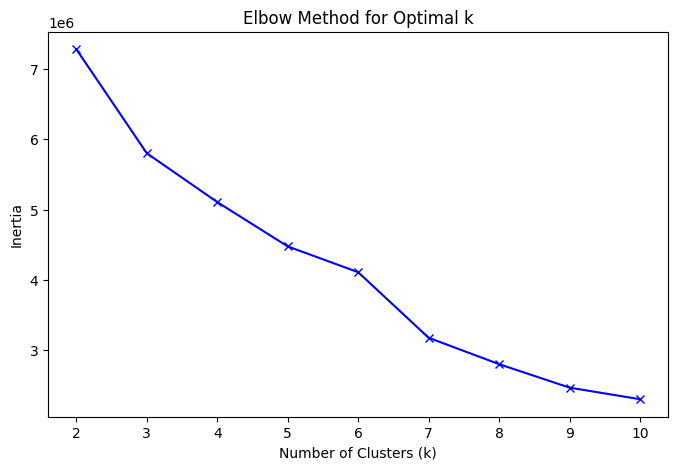

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertias = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


#### Step 6: Outlier/Anomaly Detection

In [7]:
centers = kmeans.cluster_centers_
distances = np.zeros(len(X_scaled))
for i in range(n_clusters):
    cluster_points = X_scaled[df['Cluster'] == i]
    distances[df['Cluster'] == i] = np.sqrt(((cluster_points - centers[i]) ** 2).sum(axis=1))
df['Distance_to_Center'] = distances

# define anomaly threshold
distance_threshold = df['Distance_to_Center'].quantile(0.95)  # Top 5% distances
volume_spike_threshold = df['Volume_Spike'].quantile(0.95) # Top 5% volume spikes
trade_spike_threshold = df['Trade_Count_Spike'].quantile(0.95) # Top 5% trade spikes
turnover_spike_threshold = df['Turnover_Spike'].quantile(0.95) # Top 5% turnover spikes
price_change_threshold = 10  # 10% as specified

# flag suspicious trades
df['Is_Suspicious'] = (df['Distance_to_Center'] > distance_threshold) & (
    (df['Volume_Spike'] > volume_spike_threshold) | 
    (df['Trade_Count_Spike'] > trade_spike_threshold) | 
    (df['Turnover_Spike'] > turnover_spike_threshold) |
    (abs(df['Price_Change_Pct']) > price_change_threshold))

# # Filter suspicious trades
# suspicious_trades = df[df['Is_Suspicious']].copy()
# suspicious_trades = suspicious_trades[['Date', 'Symbol', 'Price_Change_Pct', 
#                                          'Intraday_Range', 'Volume_Spike', 
#                                          'Trade_Count_Spike', 'Turnover_Spike', 
#                                          'VWAP', 'Relative_Turnover', 
#                                          'Price_to_Volume_Ratio']]
# suspicious_trades['Date'] = suspicious_trades['Date'].dt.strftime('%Y-%m-%d')
# suspicious_trades = suspicious_trades.sort_values(by='Date', ascending=False)
# suspicious_trades.reset_index(drop=True, inplace=True)
# suspicious_trades.head(20)





#### Step 7: Suspicious Symbol Scoring

In [8]:
suspicion_scores = df.groupby('Symbol').agg(
    Flagged_Trades=('Is_Suspicious', 'sum'),
    Total_Trades=('Is_Suspicious', 'count')
)
suspicion_scores['Suspicion_Score'] = (suspicion_scores['Flagged_Trades'] / 
                                      suspicion_scores['Total_Trades']) * 100

# Assign risk labels
def label_risk(score):
    if score > 5:
        return 'High Risk'
    elif 3 < score < 5:
        return 'Medium Risk'
    else:
        return 'Low Risk'

suspicion_scores['Risk_Label'] = suspicion_scores['Suspicion_Score'].apply(label_risk)
suspicion_scores.reset_index(inplace=True)


#### Fraud classification

In [9]:
def classify_fraud(row, df_symbol):
    if not row['Is_Suspicious']:
        return 'None'
    
    # look ahead 5 days for reversals
    future_data = df_symbol[
        (df_symbol['Date'] > row['Date']) & 
        (df_symbol['Date'] <= row['Date'] + pd.Timedelta(days=5))
    ]
    
    # Pump & Dump: Price surge (>10%) + volume spike, followed by crash (<-10%)
    if (row['Price_Change_Pct'] > 10 and row['Volume_Spike'] > volume_spike_threshold and
        future_data['Price_Change_Pct'].min() < -10 if not future_data.empty else False):
        return 'Pump & Dump'
    
    # Spoofing: High trade/volume spike, low price change
    if (row['Trade_Count_Spike'] > trade_spike_threshold and 
        row['Volume_Spike'] > volume_spike_threshold and 
        abs(row['Price_Change_Pct']) < 5):
        return 'Spoofing'
    
    # Rug Pull: Volume + price surge, followed by volume + price collapse
    if (row['Price_Change_Pct'] > 10 and row['Volume_Spike'] > volume_spike_threshold and
        (future_data['Volume_Spike'].min() < 0.5 and future_data['Price_Change_Pct'].min() < -10) 
        if not future_data.empty else False):
        return 'Rug Pull'
    
    # Insider Trading: Large price move (>10%) with low volume
    if (abs(row['Price_Change_Pct']) > 10 and row['Volume_Spike'] < 1.0):
        return 'Insider Trading'
    
    # Fake Breakout: Sharp price move outside range, quick reversal
    if (abs(row['Price_Change_Pct']) > 10 and 
        row['Intraday_Range'] > df_symbol['Intraday_Range'].quantile(0.9) and
        (future_data['Price_Change_Pct'].min() * row['Price_Change_Pct'] < 0) 
        if not future_data.empty else False):
        return 'Fake Breakout'
    
    return 'Unclassified Fraud'

    
    

# apply fraud classification per symbol
df['Fraud_Type'] = df.groupby('Symbol').apply(
    lambda x: x.apply(classify_fraud, axis=1, df_symbol=x)
).reset_index(level=0, drop=True)

C:\Users\asif.zaman\AppData\Local\Temp\ipykernel_12740\1487323288.py:45: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



#### Final output


Symbol: UNILEVERCL
Suspicion Score: 7.1%
Risk Labeling: High Risk
Pump & Dump Rate: 0.0%
Spoofing Rate: 45.8%
Rug Pull Rate: 0.0%
Insider Trading Rate: 0.0%
Fake Breakout Rate: 0.5%
Anomaly (Unclassified) Rate: 0.0%


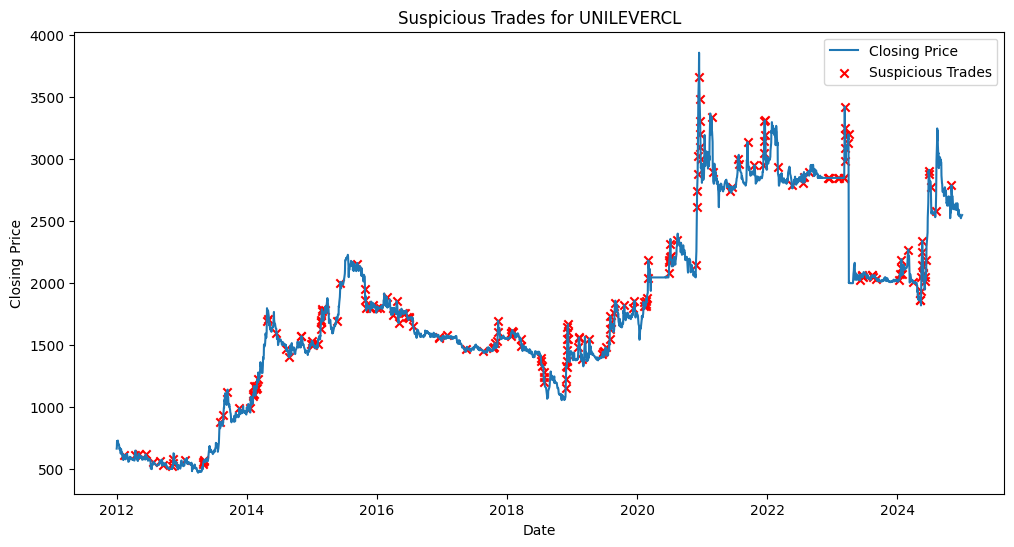


Suspicion Scores by Stock:
         Symbol  Flagged_Trades  Total_Trades  Suspicion_Score Risk_Label
424  UNILEVERCL             214          3000         7.133333  High Risk
344  RECKITTBEN             207          2819         7.343029  High Risk
80    BERGERPBL             192          2971         6.462471  High Risk
64        BATBC             190          3041         6.247945  High Risk
349   RENWICKJA             169          2934         5.760055  High Risk
..          ...             ...           ...              ...        ...
100    CBLPBOND               0             1         0.000000   Low Risk
78   BENGALBISC               0            22         0.000000   Low Risk
60   BANKASI1PB               0             4         0.000000   Low Risk
47     APEXWEAV               0            22         0.000000   Low Risk
442  WONDERTOYS               0            22         0.000000   Low Risk

[447 rows x 5 columns]

Sample Flagged Trades for SEAPEARL:


,Date,Symbol,Price_Change_Pct,Volume_Spike,Trade_Count_Spike,Turnover_Spike,Anomaly_Score,Fraud_Type,Suspicion_Score,Risk_Label
6534,2018-03-29,BEXIMCO,8.968610,5.750479,4.666454,5.590647,3.096269,Unclassified Fraud,1.154354,Low Risk
6545,2018-04-02,BEXIMCO,2.641509,5.945154,4.893906,6.352637,3.428175,Spoofing,1.154354,Low Risk
6572,2018-04-05,BEXIMCO,7.894737,5.496143,5.097586,5.924580,3.316267,Unclassified Fraud,1.154354,Low Risk
6590,2018-04-09,BEXIMCO,4.436860,5.616862,4.657927,6.223894,3.152652,Spoofing,1.154354,Low Risk
9342,2020-07-08,BEXIMCO,2.307692,6.433333,3.522097,6.249155,3.396347,Spoofing,1.154354,Low Risk
10015,2020-08-03,BEXIMCO,6.716418,5.275204,5.461110,5.548509,3.390713,Unclassified Fraud,1.154354,Low Risk
10254,2020-08-06,BEXIMCO,11.971831,4.808944,4.586460,5.376626,2.959646,Unclassified Fraud,1.154354,Low Risk
10436,2020-08-10,BEXIMCO,3.333333,5.189421,5.395295,6.331625,3.543091,Spoofing,1.154354,Low Risk
14892,2023-01-15,BEXIMCO,0.000000,6.684737,4.092769,6.684055,3.666360,Spoofing,1.154354,Low Risk
14955,2023-01-16,BEXIMCO,0.000000,6.650135,3.745365,6.649976,3.532197,Spoofing,1.154354,Low Risk


In [12]:
# # flagged trades with anomaly score
# flagged_trades = df[df['Is_Suspicious']][[
#     'Date', 'Symbol', 'Price_Change_Pct', 'Volume_Spike', 'Trade_Count_Spike', 
#     'Turnover_Spike', 'Distance_to_Center', 'Fraud_Type'
# ]].copy()
# flagged_trades.rename(columns={'Distance_to_Center': 'Anomaly_Score'}, inplace=True)

# # marge suspicion scores and risk label
# output = flagged_trades.merge(
#     suspicion_scores[['Symbol', 'Suspicion_Score', 'Risk_Label']], 
#     on='Symbol', 
#     how='left'
# )

# # plot for 1JANATAMF
# symbol_name = 'SEAPEARL'
# symbol = symbol_name if symbol_name in df['Symbol'].values else df['Symbol'].unique()[0]
# stock_data = df[df['Symbol'] == symbol]
# suspicious_trades = stock_data[stock_data['Is_Suspicious']]

# plt.figure(figsize=(12, 6))
# plt.plot(stock_data['Date'], stock_data['Closing_Price'], label='Closing Price')
# plt.scatter(suspicious_trades['Date'], suspicious_trades['Closing_Price'], 
#             color='red', marker='x', label='Suspicious Trades')
# plt.title(f'Suspicious Trades for {symbol}')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.legend()
# plt.show()


# # Print summary
# print("Suspicion Scores by Stock:")
# print(suspicion_scores.sort_values(by='Flagged_Trades', ascending=False))
# print("\nSample Flagged Trades:")

# # fetch high risk from output
# high_risk_trades = output[output['Symbol'] == 'SEAPEARL'].copy()
# high_risk_trades.head(1000)



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Step 9: Final Output
# Flagged trades with anomaly score
flagged_trades = df[df['Is_Suspicious']][[
    'Date', 'Symbol', 'Price_Change_Pct', 'Volume_Spike', 'Trade_Count_Spike', 
    'Turnover_Spike', 'Distance_to_Center', 'Fraud_Type'
]].copy()
flagged_trades.rename(columns={'Distance_to_Center': 'Anomaly_Score'}, inplace=True)

# Merge suspicion scores and risk label
output = flagged_trades.merge(
    suspicion_scores[['Symbol', 'Suspicion_Score', 'Risk_Label']], 
    on='Symbol', 
    how='left'
)

# Plot for SEAPEARL
symbol_name = 'UNILEVERCL'
symbol = symbol_name if symbol_name in df['Symbol'].values else df['Symbol'].unique()[0]
stock_data = df[df['Symbol'] == symbol]
suspicious_trades = stock_data[stock_data['Is_Suspicious']]

# plt.figure(figsize=(12, 6))
# plt.plot(stock_data['Date'], stock_data['Closing_Price'], label='Closing Price')
# plt.scatter(suspicious_trades['Date'], suspicious_trades['Closing_Price'], 
#             color='red', marker='x', label='Suspicious Trades')
# plt.title(f'Suspicious Trades for {symbol}')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.legend()
# plt.show()



# New Summary Output for SEAPEARL
if symbol in df['Symbol'].values:
    # Get Suspicion Score and Risk Label
    symbol_score = suspicion_scores[suspicion_scores['Symbol'] == symbol][['Suspicion_Score', 'Risk_Label']]
    suspicion_score = symbol_score['Suspicion_Score'].iloc[0] if not symbol_score.empty else 0.0
    risk_label = symbol_score['Risk_Label'].iloc[0] if not symbol_score.empty else 'Low Risk'

    # Calculate Fraud Type Rates
    symbol_suspicious = output[output['Symbol'] == symbol]
    total_suspicious = len(symbol_suspicious)
    if total_suspicious > 0:
        fraud_counts = symbol_suspicious['Fraud_Type'].value_counts()
        fraud_rates = (fraud_counts / total_suspicious * 100).to_dict()
    else:
        fraud_rates = {
            'Pump & Dump': 0.0,
            'Spoofing': 0.0,
            'Rug Pull': 0.0,
            'Insider Trading': 0.0,
            'Fake Breakout': 0.0,
            'Anomaly (Unclassified)': 0.0
        }

    # Ensure all fraud types are included
    all_fraud_types = ['Pump & Dump', 'Spoofing', 'Rug Pull', 'Insider Trading', 
                       'Fake Breakout', 'Anomaly (Unclassified)']
    fraud_rates = {ft: fraud_rates.get(ft, 0.0) for ft in all_fraud_types}

    # Print Summary
    print(f"\nSymbol: {symbol}")
    print(f"Suspicion Score: {suspicion_score:.1f}%")
    print(f"Risk Labeling: {risk_label}")
    for fraud_type in all_fraud_types:
        print(f"{fraud_type} Rate: {fraud_rates[fraud_type]:.1f}%")


plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Closing_Price'], label='Closing Price')
plt.scatter(suspicious_trades['Date'], suspicious_trades['Closing_Price'], 
            color='red', marker='x', label='Suspicious Trades')
plt.title(f'Suspicious Trades for {symbol}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()




# Print existing summary
print("\nSuspicion Scores by Stock:")
print(suspicion_scores.sort_values(by='Flagged_Trades', ascending=False))
print("\nSample Flagged Trades for SEAPEARL:")
high_risk_trades = output[output['Symbol'] == 'BEXIMCO' ].copy()
high_risk_trades.head(1000)